## Observations and Insights 

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = mouse_metadata.merge(study_results, on="Mouse ID", how="inner")

# Display the data table for preview
combined_data_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [235]:
# Checking the number of mice.

#-------------------------------------

#how many mice in mouse_metadata?

mouse_count = mouse_metadata["Mouse ID"].count()

#how many mice in the merged dataframe?

df_grouped = combined_data_df.groupby(["Mouse ID"])
df_grouped.size()
len(df_grouped.size())
mouse_count_2 = len(df_grouped.size())

#do the two counts equal one another?

if mouse_count == mouse_count_2:
    print("They Match!! Onto the next step!!"),
else: print("Uhhh...")


They Match!! Onto the next step!!


In [236]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicates=combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"])
#duplicates=pd.DataFrame({'Mouse':duplicates.index, 'Value':duplicates.values})
#duplicates.head()
#duplicates.head(20)

#df = pd.concat([combined_data_df, duplicates], axis=1, join='outer')
#df.head(20)

#df = df[df.Value == True]
#df.head(20)

In [237]:
# Optional: Get all the data for the duplicate mouse ID. 

#dropped_entries_df = combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first", inplace=True)
#type(dropped_duplicates_df)

In [238]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


cleaner_df = combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

cleaner_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [239]:
# Checking the number of mice in the clean DataFrame.

if len(combined_data_df) == len(cleaner_df):
    print("Looks like you missed something...(or there was no duplicate data)")
elif len(combined_data_df) > len(cleaner_df):
    print("You removed " f'{len(combined_data_df) - len(cleaner_df)}' " duplicates. Congrats! There are now only " f'{len(cleaner_df)}' " mice in this dataframe.")
else: print("How in the world did you manage to add rows trying to drop duplicates?")

You removed 10 duplicates. Congrats! There are now only 1883 mice in this dataframe.


## Summary Statistics

In [240]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# I'm guessing meaning at the end of the drug trial since all the tumors start off at 45 (mm3) across all mice

regimen_df = cleaner_df.drop_duplicates(["Mouse ID"], keep="last")

#Find the means
regimen_means_df = regimen_df.groupby(["Drug Regimen"]).mean()
regimen_means_df = regimen_means_df.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
regimen_means_df = regimen_means_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Size"})
regimen_means_df.head(20).sort_values(by="Mean Tumor Size", ascending=True)

#Find the medians
regimen_medians_df = regimen_df.groupby(["Drug Regimen"]).median()
regimen_medians_df = regimen_medians_df.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
regimen_medians_df = regimen_medians_df.rename(columns={"Tumor Volume (mm3)":"Median Tumor Size"})
regimen_medians_df.head(20).sort_values(by="Median Tumor Size", ascending=True)

###begin merging into single, summary dataframe
regimen_stats_df = regimen_means_df.merge(regimen_medians_df, on="Drug Regimen")

#Find the variances
regimen_variances_df = regimen_df.groupby(["Drug Regimen"]).var()
regimen_variances_df = regimen_variances_df.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
regimen_variances_df = regimen_variances_df.rename(columns={"Tumor Volume (mm3)":"Variance"})
regimen_variances_df.head(20).sort_values(by="Variance", ascending=True)

###merging into summary dataframe
regimen_stats_df = regimen_stats_df.merge(regimen_variances_df, on="Drug Regimen")

#Find the standard deviations
regimen_stds_df = regimen_df.groupby(["Drug Regimen"]).std()
regimen_stds_df = regimen_stds_df.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
regimen_stds_df = regimen_stds_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
regimen_stds_df.head(20).sort_values(by="Standard Deviation", ascending=True)

###merging into summary dataframe
regimen_stats_df = regimen_stats_df.merge(regimen_stds_df, on="Drug Regimen")
    
#Find the standard mean error
regimen_sems_df = regimen_df.groupby(["Drug Regimen"]).sem()
regimen_sems_df = regimen_sems_df.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
regimen_sems_df = regimen_sems_df.rename(columns={"Tumor Volume (mm3)":"Standard Mean Error"})
regimen_sems_df.head(20).sort_values(by="Standard Mean Error", ascending=True)

###final merge into summary dataframe
regimen_stats_df = regimen_stats_df.merge(regimen_sems_df, on="Drug Regimen")
    
#display
regimen_stats_df.head(15)


# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean Tumor Size,Median Tumor Size,Variance,Standard Deviation,Standard Mean Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [241]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

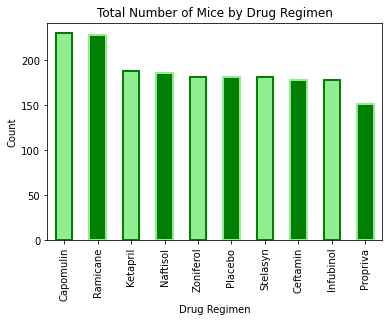

In [368]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

counts_by_regimen = cleaner_df["Drug Regimen"].value_counts()

#print(counts_by_regimen)
#make it FANCY~~
color = ("lightgreen", "green")
edgecolor = ("green", "lightgreen")

counts_by_regimen.plot(kind="bar", color=color, edgecolor=edgecolor, linewidth=2)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Total Number of Mice by Drug Regimen")
plt.show()




In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



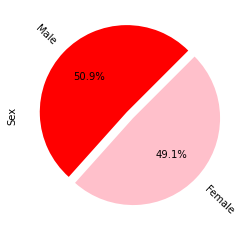

In [383]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts_by_gender = cleaner_df["Sex"].value_counts()

#make it sorta fancy~
colors = ("red", "pink") ##WHY IS IT "COLOR" FOR BAR PLOTS BUT "COLORS" FOR PIE CHARTS?
explode = (0.05, 0.05)


counts_by_gender.plot(kind="pie", explode=explode, colors=colors, rotatelabels=True, startangle=45, autopct='%1.1f%%')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [244]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen_df = regimen_df.sort_values(by=["Tumor Volume (mm3)"], ascending=True)
regimen_grouped_df = regimen_df.groupby(["Drug Regimen"])

#see dataframe of only last Timepoints with drug regimen, tumor volume data too
regimen_df.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [320]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_sizes = []
high_outliers = []
low_outliers = []

for treatment in treatments:
    tumor_size = regimen_df.loc[regimen_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)" ]
    tumor_sizes.append(tumor_size)

#list(tumor_sizes)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # quartiles first
    tumor_quartiles = tumor_size.quantile([0.25, 0.50, 0.75])
    lower_quartile = tumor_quartiles[0.25]
    upper_quartile = tumor_quartiles[0.75]
    
 #determine iqr, bounds   
    iqr = upper_quartile - lower_quartile
    iqr_buffer = iqr*1.5
    lower_bound = lower_quartile - iqr_buffer
    upper_bound = upper_quartile + iqr_buffer
    
 #determine outliers   
    outliers_high = tumor_size.loc[(tumor_size > upper_bound)]
    outliers_low = tumor_size.loc[(tumor_size < lower_bound)]
    
    low_outliers.append(outliers_low)
    high_outliers.append(outliers_high)
 #check, for each treatment, outliers_low and outliers_high values for outliers -- 
    #trying to make into a dataframe first is messier than just printing out the outliers directly
    
    #---------
    #outliers_df = pd.concat([outliers_high, outliers_low], axis=1)
    #treatments_df = pd.DataFrame(treatments)
    #final_df = pd.concat([treatments_df, outliers_df], axis=1)
    #print(outliers_df)
    #----------

    print(f"{treatment}" " has high outlier - " f"{outliers_high}" " and/or low outlier - " f"{outliers_low}" ".")

  #if treatment returns 'Series..', then there is no outlier - outliers return a 2 element array, the id no. and the tumor vol.


Capomulin has high outlier - Series([], Name: Tumor Volume (mm3), dtype: float64) and/or low outlier - Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane has high outlier - Series([], Name: Tumor Volume (mm3), dtype: float64) and/or low outlier - Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol has high outlier - Series([], Name: Tumor Volume (mm3), dtype: float64) and/or low outlier - 669    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin has high outlier - Series([], Name: Tumor Volume (mm3), dtype: float64) and/or low outlier - Series([], Name: Tumor Volume (mm3), dtype: float64).


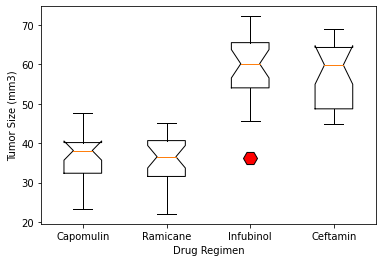

In [332]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outlier_style=dict(markerfacecolor="red", marker="H", markersize=14)

plt.boxplot(tumor_sizes, labels = treatments, notch=True, flierprops=outlier_style)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Size (mm3)")
plt.show()

#you can see the low Infubinol outlier revealed above clearly now
#notch makes boxes look like dresses on display

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
